In [1]:
# Impotação e instalação de Bibliotecas para modelagem dos dados

!pip install plotly
!pip install nbformat
!pip install --upgrade nbformat
import pandas as pd
import numpy as np
import plotly.express as px

In [91]:
# Leitura e visualização das bases de dados
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("CCEE_BR_Data.csv.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(
        path="")

table = pd.read_csv('CCEE_BR_Data.csv', encoding='UTF-8')
table

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
0,01/07/2018,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01,0
1,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.00,0
2,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0.68,0
3,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,SC,1.88,0
4,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.04,0
...,...,...,...,...,...,...,...
418606,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,DF,689.19,1
418607,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,AC,121.34,1
418608,19/06/2020,Distribuidor,ACR,SUL,SC,2012.83,1
418609,19/06/2020,Distribuidor,ACR,SUL,RS,2310.67,1


In [10]:
# Especificação do número de linhas e colunas da tabela

print(f'QUANTIDADE DE LINHAS: {table.shape[0]}\n')
print(f'QUANTIDADE DE COLUNAS: {table.shape[1]}')

QUANTIDADE DE LINHAS: 418611

QUANTIDADE DE COLUNAS: 7


In [20]:
# Tipos de variáveis de cada coluna e quantidade de valores não-nulos da base geral

table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418611 entries, 0 to 418610
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Data        418611 non-null  object 
 1   Classe      418611 non-null  object 
 2   Ramo        418611 non-null  object 
 3   Submercado  418611 non-null  object 
 4   UF          418611 non-null  object 
 5   Consumo     418611 non-null  float64
 6   Covid       418611 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 22.4+ MB


In [21]:
# Quantidade de dados nulos em cada coluna da base geral

table.isnull().sum()

Data          0
Classe        0
Ramo          0
Submercado    0
UF            0
Consumo       0
Covid         0
dtype: int64

In [11]:
# Métricas estatísticas da tabela geral

table.describe()

,Consumo,Covid
count,418611.000000,418611.000000
mean,106.361081,0.130080
std,580.168023,0.336392
min,0.000000,0.000000
25%,1.620000,0.000000
50%,6.720000,0.000000
75%,30.255000,0.000000
max,14173.800000,1.000000


In [15]:
# Lista das classes de consumidores de energia

table['Classe'].unique().tolist()

['Autoprodutor',
 'Comercializador Varejista',
 'Consumidor Especial',
 'Consumidor Livre',
 'Distribuidor',
 'Exportador']

In [19]:
# Lista dos Ramos de consumidores de energia

table['Ramo'].unique().tolist()

['ALIMENTÍCIOS',
 'COMÉRCIO',
 'EXTRAÇÃO DE MINERAIS METÁLICOS',
 'MADEIRA PAPEL E CELULOSE',
 'MANUFATURADOS DIVERSOS',
 'METALURGIA E PRODUTOS DE METAL',
 'MINERAIS NÃO-METÁLICOS',
 'QUÍMICOS',
 'SERVIÇOS',
 'TÊXTEIS',
 'BEBIDAS',
 'SANEAMENTO',
 'TELECOMUNICAÇÕES',
 'TRANSPORTE',
 'VEÍCULOS',
 'ACR']

In [22]:
# Lista das submercados consumidores de energia

table['Submercado'].unique().tolist()

['NORDESTE', 'SUDESTE / CENTRO-OESTE', 'SUL', 'NORTE']

In [54]:
# Top 3 maiores Ramos Consumidores de Energia

table.groupby('Ramo')['Consumo'].sum().nlargest(3)

Ramo
ACR                               31044454.43
METALURGIA E PRODUTOS DE METAL     3375629.15
QUÍMICOS                           1411042.58
Name: Consumo, dtype: float64

In [53]:
# Consumo de Energia agrupado por estado (Jul/2018 - Jun/2020)

table.groupby('UF')['Consumo'].sum().sort_values(ascending=True)

UF
AC        88930.69
AP       153841.11
TO       224248.34
RO       322593.60
SE       339587.65
PI       391059.73
AL       407784.71
MS       509103.34
PB       517163.06
RN       522526.78
DF       593988.01
MA       720995.25
AM       753955.16
MT       803951.18
ES      1026721.42
CE      1158800.26
PE      1417378.47
GO      1486370.87
PA      1725883.96
SC      2263545.92
BA      2447270.38
RS      2761001.32
PR      2790061.68
RJ      4154876.09
MG      5072253.44
SP     11870026.25
Name: Consumo, dtype: float64

In [55]:
# Top 10 maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top10 = table.groupby('UF')['Consumo'].sum().nlargest(10)
table_top10

UF
SP     11870026.25
MG      5072253.44
RJ      4154876.09
PR      2790061.68
RS      2761001.32
BA      2447270.38
SC      2263545.92
PA      1725883.96
GO      1486370.87
PE      1417378.47
Name: Consumo, dtype: float64

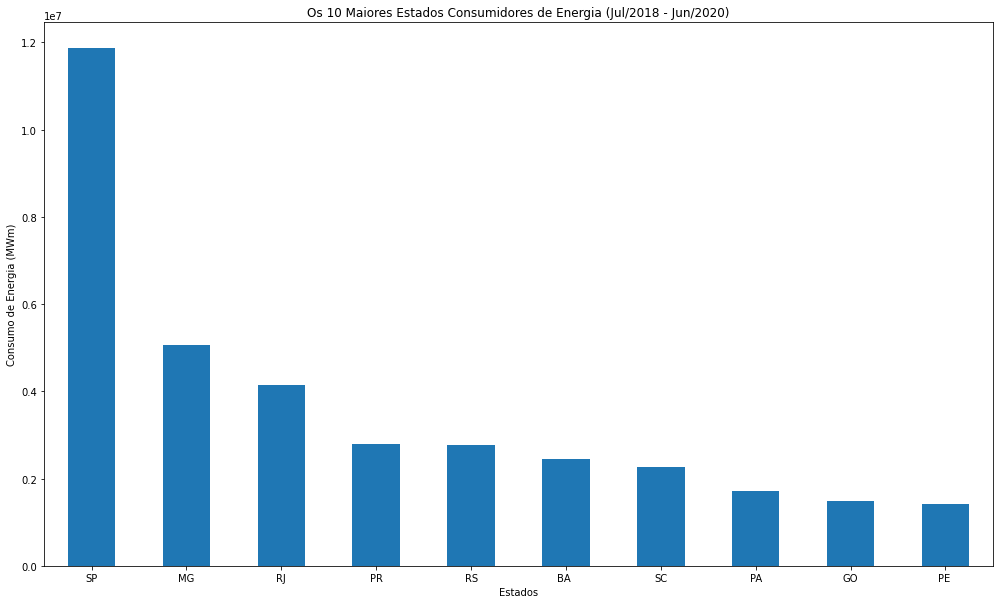

In [70]:
# Visualização Gráfica dos 10 maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top10_bar = table_top10.plot(kind='bar', rot=0, xlabel='Estados', 
                                   ylabel='Consumo de Energia (MWm)',
    title='Os 10 Maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)', 
    figsize=(17,10))

In [71]:
table.drop(columns='Covid', inplace=True)
table.rename(columns={'Consumo':'MWm'}, inplace=True)
table['Data'] = pd.to_datetime(table['Data'], format='%d/%m/%Y').dt.year
table_2019 = table.loc[(table['Data'] == 2019)]
table_2019

,Data,Classe,Ramo,Submercado,UF,MWm
102670,2019,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01
102671,2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.24
102672,2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0.19
102673,2019,Autoprodutor,ALIMENTÍCIOS,SUL,SC,0.15
102674,2019,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.11
...,...,...,...,...,...,...
312631,2019,Distribuidor,ACR,SUL,SC,2345.76
312632,2019,Distribuidor,ACR,SUL,RS,3569.17
312633,2019,Distribuidor,ACR,SUL,PR,2698.92
312634,2019,Exportador,SERVIÇOS,SUL,SC,0.00


In [72]:
agregado = table_2019.groupby(by='Classe').agg(set)
agregado['MWm'] = [sum(x) for x in agregado['MWm']]
agregado.sort_values(by='MWm', ascending=False, inplace=True)
agregado

,Data,Ramo,Submercado,UF,MWm
Classe,,,,,
Distribuidor,{2019},{ACR},"{SUL, SUDESTE / CENTRO-OESTE, NORDESTE, NORTE}","{PI, AC, PR, SP, MT, AM, MG, TO, MS, PE , GO, ...",1.581386e+07
Consumidor Livre,{2019},"{EXTRAÇÃO DE MINERAIS METÁLICOS, MANUFATURADOS...","{SUL, SUDESTE / CENTRO-OESTE, NORDESTE, NORTE}","{PI, PR, SE, SP, MT, AM, MG, TO, MS, GO, CE, A...",3.400625e+06
Consumidor Especial,{2019},"{EXTRAÇÃO DE MINERAIS METÁLICOS, MANUFATURADOS...","{SUL, SUDESTE / CENTRO-OESTE, NORDESTE, NORTE}","{PI, AC, PR, SP, MT, AM, MG, TO, MS, PE , GO, ...",7.304708e+05
Autoprodutor,{2019},"{EXTRAÇÃO DE MINERAIS METÁLICOS, MANUFATURADOS...","{SUL, NORDESTE, SUDESTE / CENTRO-OESTE, NORTE}","{PR, SP, MT, MG, MS, PE , GO, CE, AL , ES, SC,...",6.625548e+05
Comercializador Varejista,{2019},"{MANUFATURADOS DIVERSOS, SANEAMENTO, MINERAIS ...","{NORDESTE, SUL, NORTE, SUDESTE / CENTRO-OESTE}","{MG, CE, PR, RJ, ES, SC, SP, DF , PA, PE , GO,...",3.478490e+03
Exportador,{2019},{SERVIÇOS},{SUL},"{RS, SC}",0.000000e+00


In [73]:
fig = px.bar(agregado, x=agregado.index, y='MWm', color_discrete_sequence=['darkslateblue'], title='Consumo por classe em 2019')
fig.show()

# MATHEUS

- Energia por região (standby) (separar por) plotly 
- Energia por estado - Matheus
- Consumo classes na produção total - Matheus
- Consumo Ramos na produção total - Matheus

In [93]:
import pandas as pd
import numpy as np
import plotly.express as px

In [94]:
# Total de energia consumida por classe no periodo de julho/2018 até junho/2020
table_classe = table.groupby('Classe')['Consumo'].sum().sort_values(ascending=False)
#print(table_classe)

#table_classe_plot = table_classe.plot(kind='bar', 
#    rot=0, 
#    xlabel='Classes', 
#    ylabel='Consumo de Energia (MWm)',
#    title='Total de energia consumida por classe (Jul/2018 - Jun/2020)', 
#    figsize=(17,10), grid=True)

fig_classe = px.bar(table_classe, y='Consumo',title='Total de energia consumida por classe (Jul/2018 - Jun/2020', text = table_classe,
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Classe": 'Classes'})
fig_classe.show()


fig_classe_pie = px.pie(table_classe, values='Consumo', names=table_classe.index,
                        title='Total de energia consumida por classe (Jul/2018 - Jun/2020',
                       labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Classe": 'Classes'})
fig_classe_pie.show()

In [95]:
# Total de energia consumida por ramo no periodo de julho/2018 até junho/2020
table_ramo = table.groupby('Ramo')['Consumo'].sum().sort_values(ascending=False)
#print(table_ramo)

# table_ramo_plot = table_ramo.plot(kind='bar', 
#    rot=90, 
#    xlabel='Ramo', 
#    ylabel='Consumo de Energia (MWm)',
#    title='Total de energia consumida por ramo (Jul/2018 - Jun/2020)', 
#    figsize=(17,10), grid=True )

fig_ramo = px.bar(table_ramo, y='Consumo',title='Total de energia consumida por ramo (Jul/2018 - Jun/2020)', text = table_ramo,
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Ramo": 'Ramos'})
                                           
fig_ramo.show()


In [107]:
#Total de energia por estado consumida no periodo de julho/2018 até junho/2020

table_state = table.groupby('UF')['Consumo'].sum().sort_values(ascending=False)
#print(table_state)

# table_state_plot = table_state.plot(kind='bar', 
#    rot=0, 
#    xlabel='Classes', 
#    ylabel='Consumo de Energia (MWm)',
#    title='Total de energia consumida por estado (Jul/2018 - Jun/2020)', 
#    figsize=(17,10), grid=True )

fig_state = px.bar(table_state, y='Consumo',title='Total de energia consumida por estado (Jul/2018 - Jun/2020)', text = table_state,
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "UF": 'Estado'})
fig_state.show()

fig_state_pie = px.pie(table_state, values='Consumo', names=table_state.index,
                        title='Total de energia consumida por estado (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Estado": 'Estado'})
fig_state_pie.show()

In [102]:
#Separando a região Sudeste da Centro-oeste
sudeste = table.loc[(table['UF']=='SP'),'Consumo'].sum() + table.loc[(table['UF']=='RJ'),'Consumo'].sum() + table.loc[(table['UF']=='MG'),'Consumo'].sum() + table.loc[(table['UF']=='ES'),'Consumo'].sum()
centro_oeste = table.loc[(table['UF']=='MT'),'Consumo'].sum() + table.loc[(table['UF']=='MS'),'Consumo'].sum() + table.loc[(table['UF']=='GO'),'Consumo'].sum() + table.loc[(table['UF']=='DF'),'Consumo'].sum()
sud_centroeste = pd.Series([sudeste, centro_oeste], index=['SUDESTE','CENTRO-OESTE']).rename("Consumo")
print(sud_centroeste)

SUDESTE         22123877.20
CENTRO-OESTE     2799425.39
Name: Consumo, dtype: float64


In [110]:
#Total de energia consumida por região (Jul/2018 - Jun/2020)
table_submercado = table.groupby('Submercado')['Consumo'].sum().sort_values(ascending=False)
table_submercado.drop(['SUDESTE / CENTRO-OESTE'],axis =0,inplace=True)
table_submercado = pd.concat([table_submercado,sud_centroeste],axis=0)
# print(table_submercado)

# table_submercado_plot = table_submercado.plot(kind='bar', 
#    rot=0, 
#    xlabel='Classes', 
#    ylabel='Consumo de Energia (MWm)',
#    title='Total de energia consumida por região (Jul/2018 - Jun/2020)', 
#    figsize=(17,10), grid=True )

fig_submercado = px.bar(table_submercado, y='Consumo',title='Total de energia consumida por região (Jul/2018 - Jun/2020)', text = table_submercado,
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Submercado": 'Estado'})
fig_submercado.show()

fig_submercado_pie = px.pie(table_submercado, values='Consumo', names=table_submercado.index,
                        title='Total de energia consumida por região (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Submercado": 'Região'})
fig_submercado_pie.show()

# tentativa de mapa, não deu certo

In [46]:
import plotly as plt
import json
from urllib.request import urlopen

In [36]:
#Código para mapa do Brasil
with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson') as response:
    Brazil = json.load(response) 
Brazil

state_id_map = {}
for feature in Brazil ['features']:
    feature['id'] = feature['properties']['name']
    state_id_map[feature['properties']['sigla']] = feature['id']

# Brazil
# print(state_id_map)

In [35]:
estados = pd.DataFrame([state_id_map])
estados.T.rename(columns={0:"UF"})

,UF
AC,Acre
AL,Alagoas
AM,Amazonas
AP,Amapá
BA,Bahia
CE,Ceará
ES,Espírito Santo
GO,Goiás
MA,Maranhão
MG,Minas Gerais


In [42]:
estados.index.tolist()

[0]

In [47]:
estados

0    {'AC': 'Acre', 'AL': 'Alagoas', 'AM': 'Amazona...
dtype: object

In [266]:
soybean = pd.read_csv('https://raw.githubusercontent.com/nayanemaia/Dataset_Soja/main/soja%20sidra.csv')
print(soybean)

      ano            Estado  Produção  Longitude   Latitude  Unnamed: 5
0    1940          Rondônia         0 -11.474053 -62.226545         NaN
1    1950          Rondônia         1 -11.474053 -62.226545         NaN
2    1960          Rondônia         0 -11.474053 -62.226545         NaN
3    1970          Rondônia         0 -11.474053 -62.226545         NaN
4    1975          Rondônia        66 -11.474053 -62.226545         NaN
..    ...               ...       ...        ...        ...         ...
265  1980  Distrito Federal     10294 -15.858437 -47.596956         NaN
266  1985  Distrito Federal     66254 -15.858437 -47.596956         NaN
267  1995  Distrito Federal     50229 -15.858437 -47.596956         NaN
268  2006  Distrito Federal    112436 -15.858437 -47.596956         NaN
269  2017  Distrito Federal    243805 -15.858437 -47.596956         NaN

[270 rows x 6 columns]


In [34]:
fig = px.choropleth(
 soybean, #soybean database
 locations = 'Estado', #define the limits on the map/geography
 geojson = Brazil, #shape information
 color = "Produção", #defining the color of the scale through the database
 hover_name = 'Estado', #the information in the box
 hover_data =["Produção","Longitude","Latitude"],
 title = "Produtivida da soja (Toneladas)", #title of the map
 animation_frame = 'ano' #creating the application based on the year
)

fig.update_geos(fitbounds = "locations", visible = False)
fig.show()

NameError: name 'soybean' is not defined

In [61]:
print(type(table_state))

<class 'pandas.core.series.Series'>


In [47]:
fig = px.choropleth(
    table_state,
    locations = "UF", #define the limits on the map/geography
    geojson = Brazil, #shape information
    color = "Consumo", #defining the color of the scale through the database
    hover_name = 'Consumo', #the information in the box
    title = "Produtivida da soja (Toneladas)", #title of the map
)

fig.update_geos(fitbounds = "locations", visible = False)
fig.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['Consumo'] but received: UF